In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# datos random
np.random.seed(46)





#funcion escalon
def escalon(t):
    if t >= 0:
        return 1
    return 0

def prediccion(X, W, b):
    return escalon((np.matmul(X,W)+b)[0])


epocas=0



# TODO: Algoritmo Perceptron.
def perceptron_escalon(X, y, W, b, learn_rate ):


    
    
    
    solucion=prediccion(X,W,b)
    global epocas
    
       
       
       

    
    

    if solucion==0:
      #print('uno')
      if y[epocas]==0:
         W[0]=W[0]+(1*learn_rate*(X[0,0]))
         W[1]=W[1]+(1*learn_rate*(X[0,1]))
         b=b+(6.3*learn_rate)
      
    else:
       if y[epocas]==1:
         W[0]=W[0]-(1*learn_rate*(X[0,0]))
         W[1]=W[1]-(1*learn_rate*(X[0,1]))
         b=b-(6.3*learn_rate)
     
        

    epocas=epocas+1
    if epocas==99:
       epocas=0
    

    return W, b








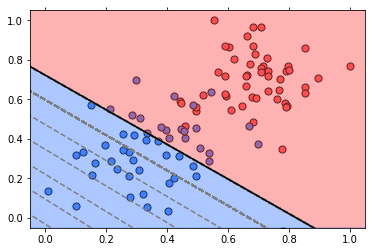

In [ ]:
def entrenamiento(X, y, learn_rate=0.013, num_epochs=100):
    """
    Esta funcion entrena el perceptron repetidamente en el dataset y retorna las lineas de clasificacion
    obtenidas en las iteraciones,
    
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    
    b = np.random.rand(1)[0] + x_max
    
    # Lineas que seran ploteadas.
    lineas = []
    for i in range(num_epochs):
        # En cada epoch, se aplica el perceptron.
        W, b = perceptron_escalon(X, y, W, b, learn_rate)
        lineas.append((-W[0]/W[1], -b/W[1]))
        
    return lineas

def plot_line(m, b, linestyle='dashed', color='gray', fill=False):
    """
    Helper function to avoid repetitive code when plotting boundary lines
    """
    x = np.arange(-1, 1.5, 0.1)
    j = np.arange(0, 0.25, 0.05)
    y1= [-0.05,-0.04,-0.03,-0.02,-0.01]
    y2= np.arange(1.5,2, 0.01)
    plt.plot(x, m*x+b, linestyle=linestyle, color=color)
    if fill:
      for i in range(5):
          plt.fill_between(x, m*x+b,-0.05, color=blue, alpha=j[i])
          plt.fill_between(x, m*x+b, 1.05, color=red, alpha=j[i])
          


# Cargamos data
data = np.asarray(pd.read_csv("https://raw.githubusercontent.com/sadoky/inteligencia-_articial_ELECT/main/data.csv"))
X = data[:,0:2]
y = data[:,2]


# Modifique a su criterio la learning rate y en numero de epoch 
lineas = entrenamiento(X, y)

# Estilo Plot
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', top='off')




# Scatter para el grafico
red = [1,0.3,0.3]
blue = [0.25,0.5,1]
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')

# Plotea lineas y regiones solucion.
for line in lineas:
    slope = line[0]
    b = line[1]
    plot_line(slope, b)
solution_slope = lineas[-1][0]
solution_intercept = lineas[-1][1]
plot_line(solution_slope, solution_intercept, 'solid', 'k', True)
  